In [2]:
#importing the numpy library
import numpy as np
#importing pandas library
import pandas as pd
#importing matplotlib for visualization
import matplotlib.pyplot as plt
#import seaborn library for visualization 
import seaborn as sns
#importing train_test_split
from sklearn.model_selection import train_test_split
#StandardScaler for scaling the dataset
from sklearn.preprocessing import StandardScaler
#LogisticRegression from linear_model
from sklearn.linear_model import LogisticRegression
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#DecisionTreeClassifier which is tree based classification model
from sklearn.tree import DecisionTreeClassifier
#LinearSVC and SVC
from sklearn.svm import LinearSVC,SVC
#neural Network
from sklearn.neural_network import MLPClassifier
#RandomForest and GradientBoosting
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
#xgboost
from xgboost import XGBClassifier
#lighbgms
from lightgbm import LGBMClassifier
#catboostclassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings(action='ignore')

# Loading the Dataset

In [3]:
df=pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
#showing the dataset
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Getting the Preliminary Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# Checking For Null Values

In [5]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# Exploratory Data Analysis

In [6]:
eda_df=df.copy()

# Visualization the Dataset

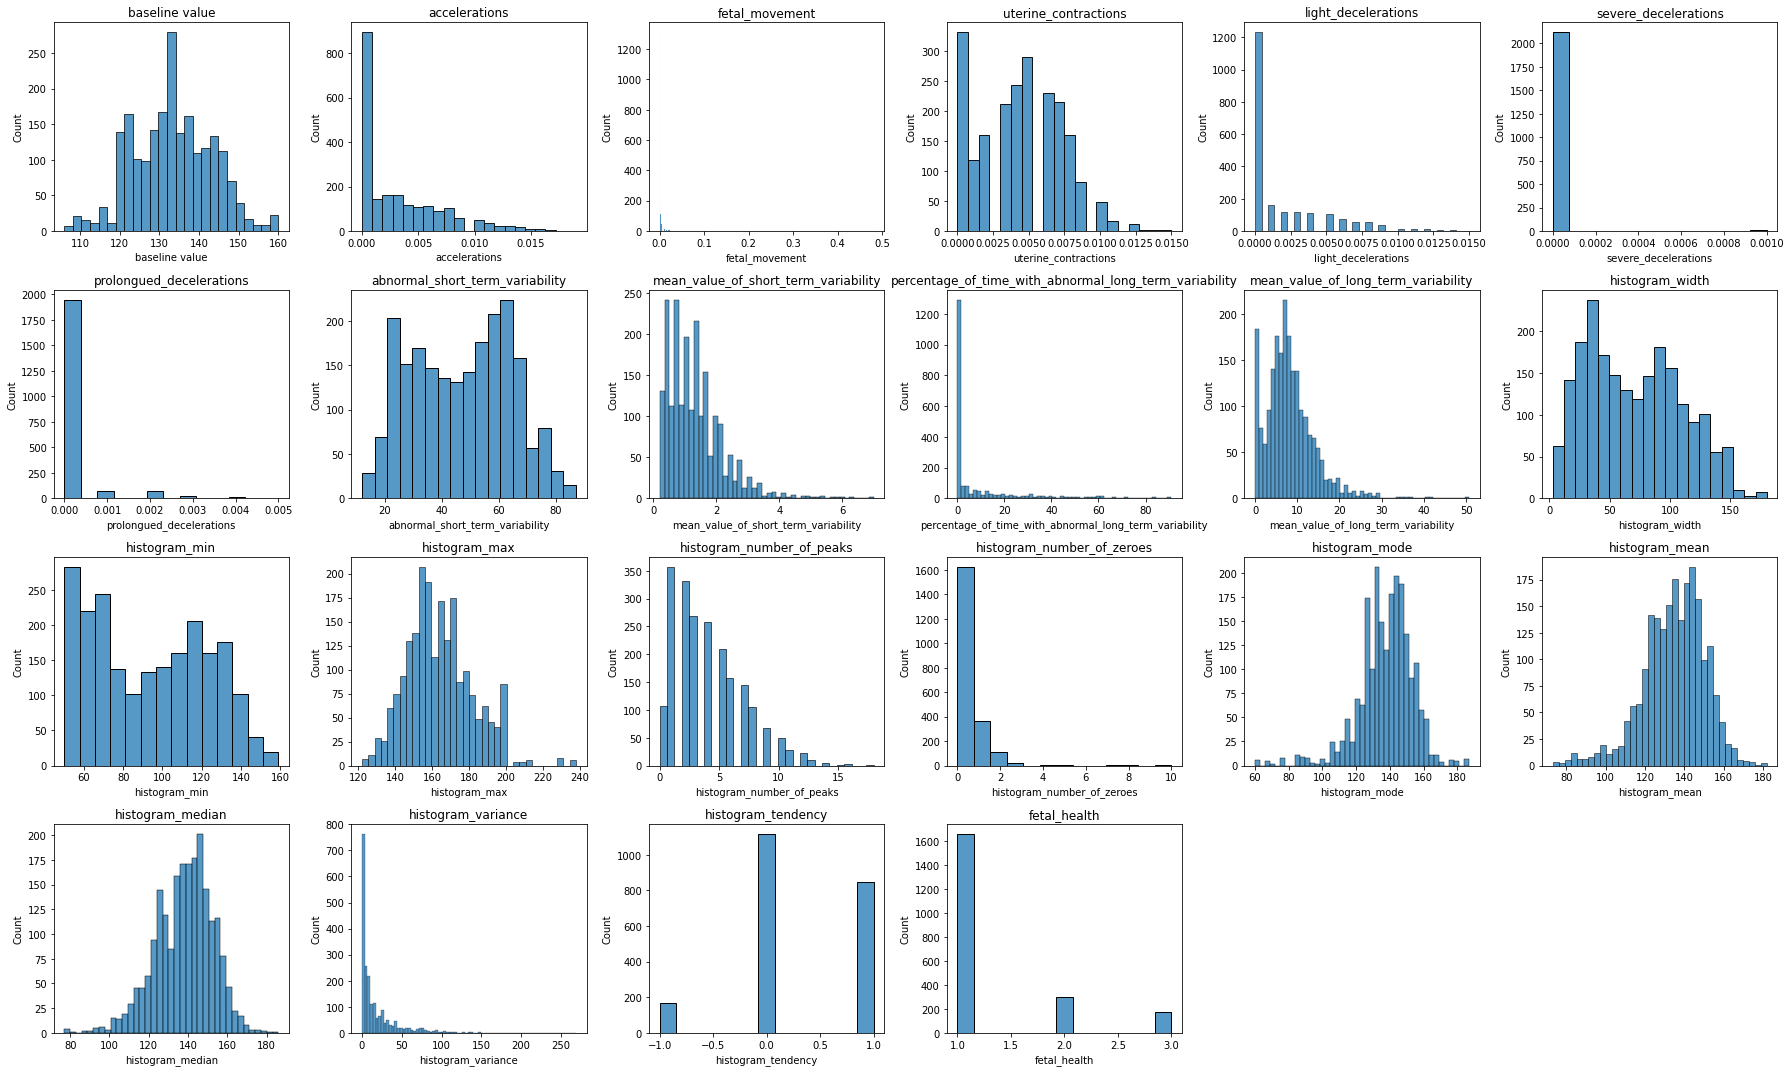

In [7]:
plt.figure(figsize=(25,15))
#looping throug the columns
for i, column in enumerate(eda_df.columns):
    plt.subplot(4,6,i+1)
    sns.histplot(data=eda_df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Creating BoxPlot

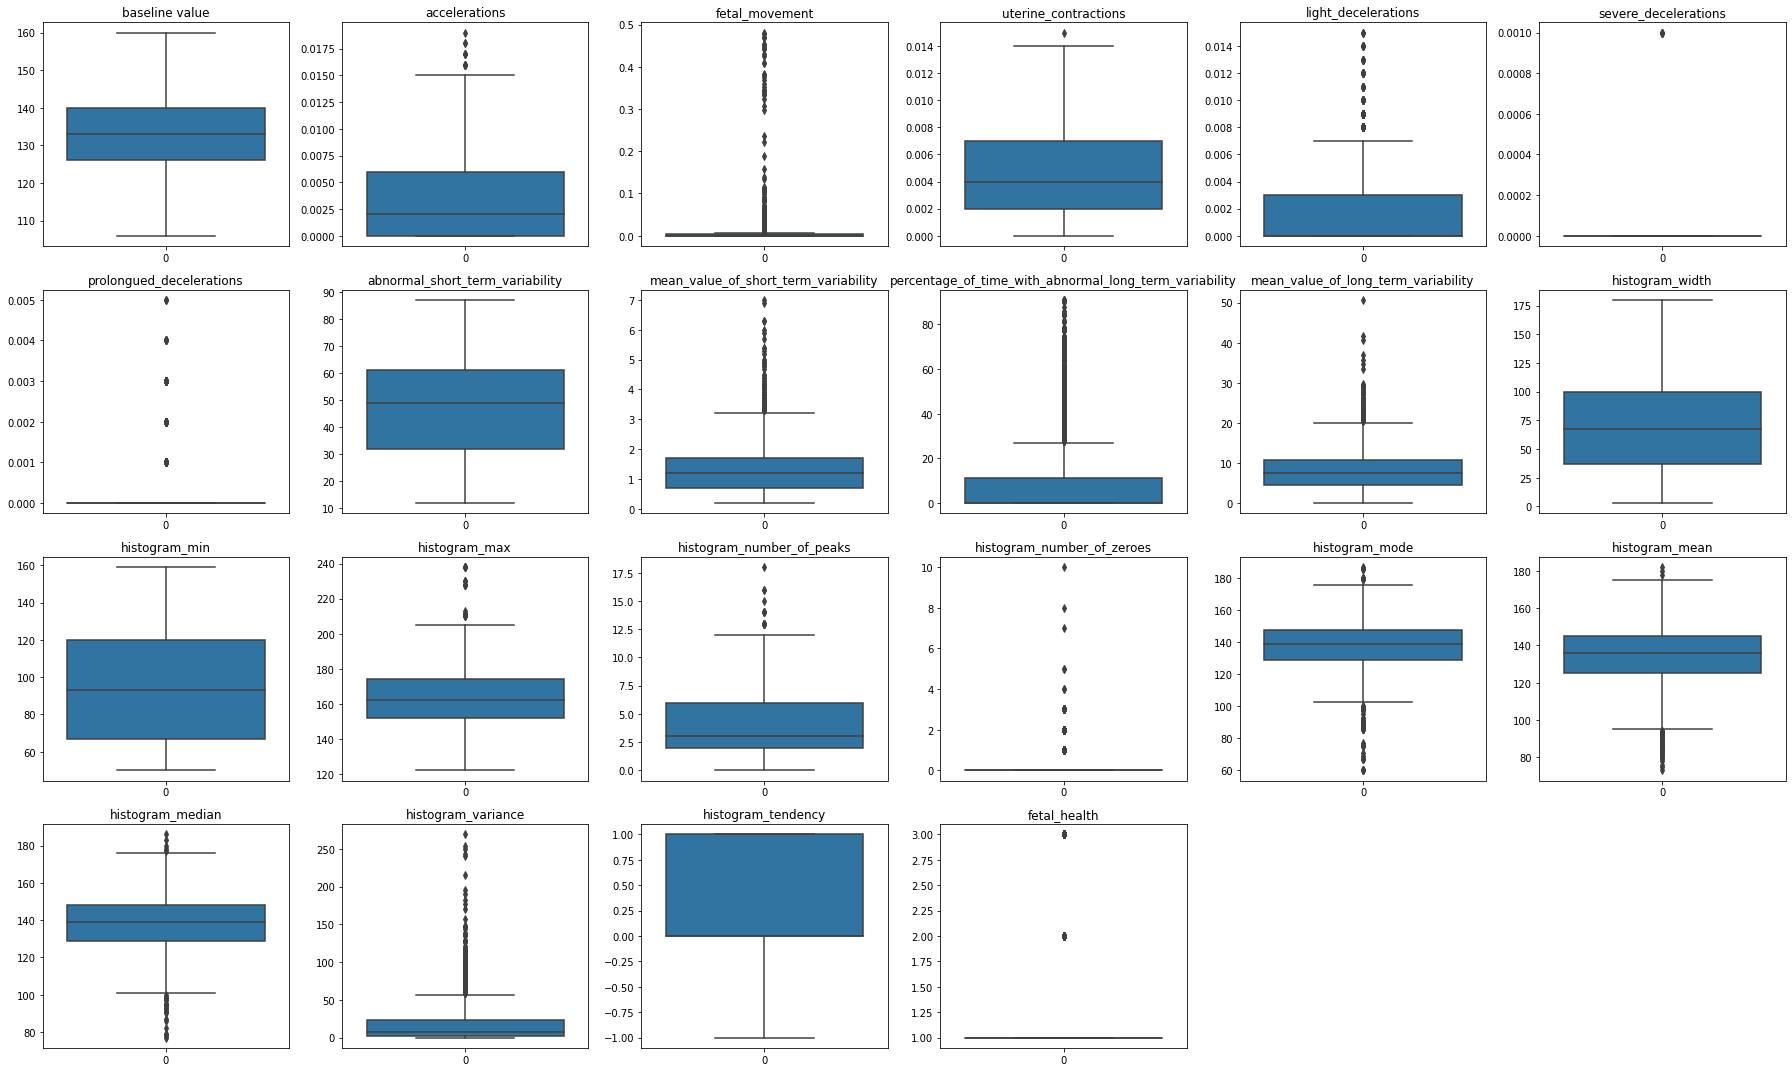

In [8]:
plt.figure(figsize=(25,15))
#looping throug the columns
for i, column in enumerate(eda_df.columns):
    plt.subplot(4,6,i+1)
    sns.boxplot(data=eda_df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Correlation Matrix

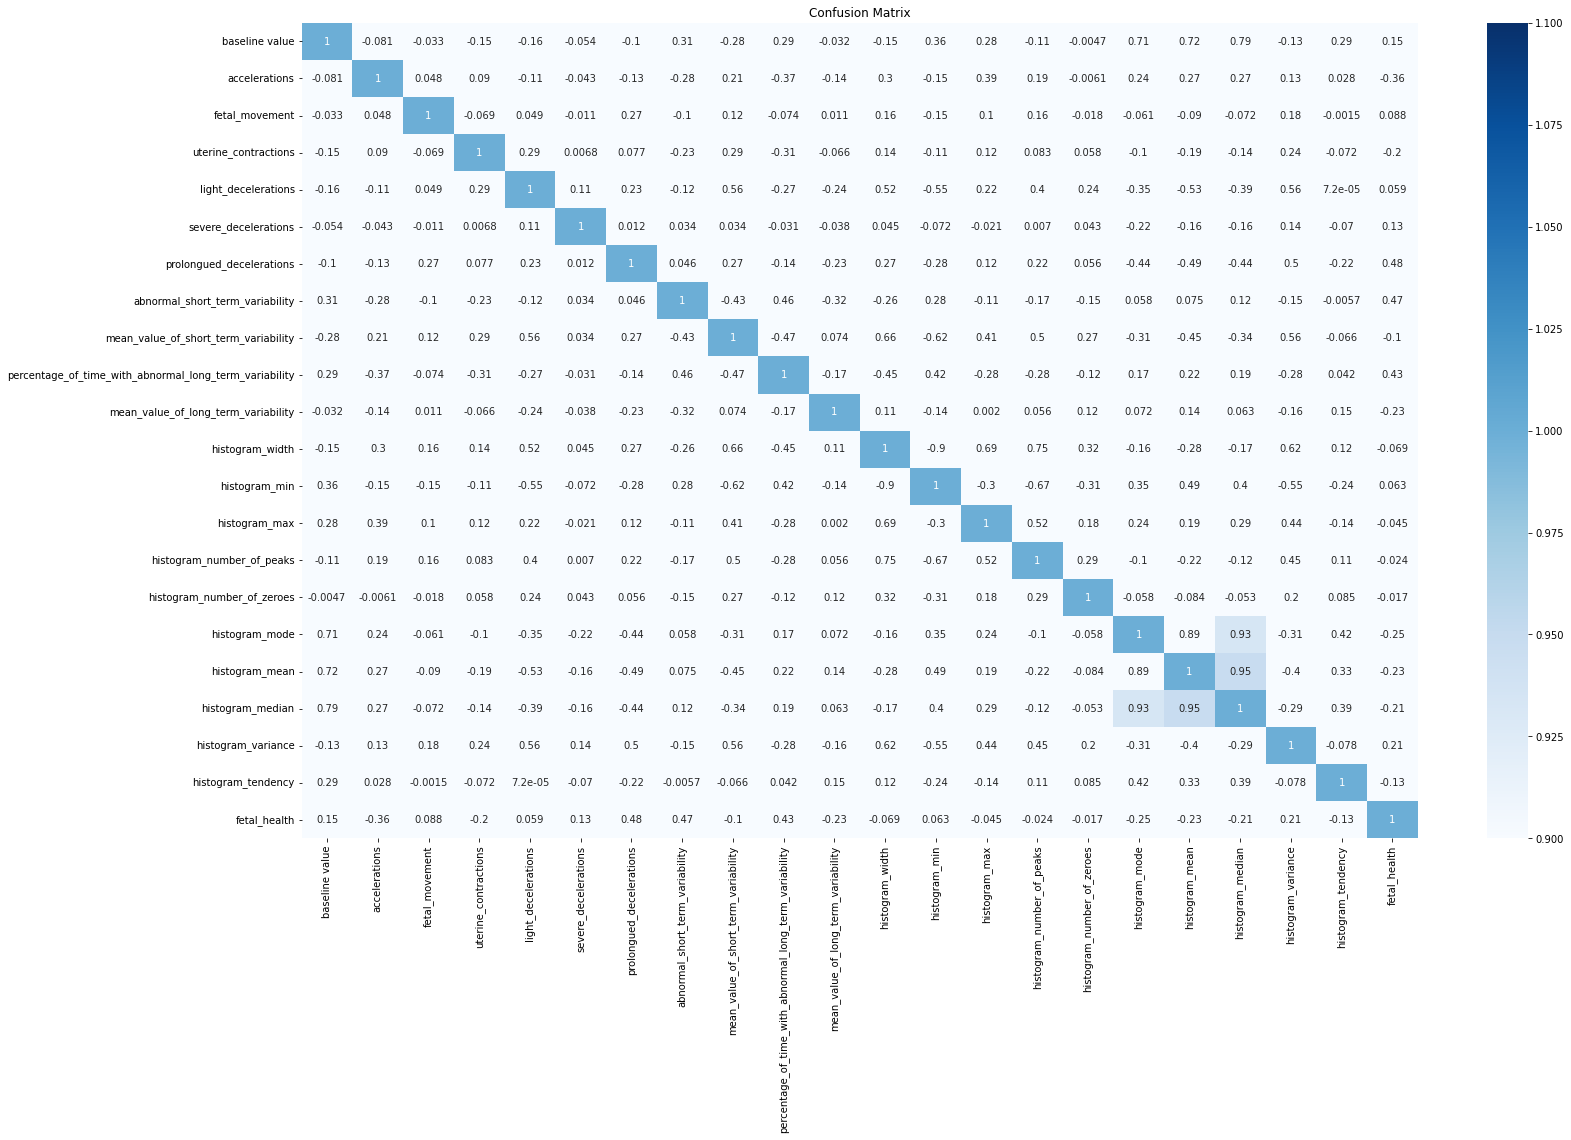

In [9]:
corr=eda_df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [10]:
print(enumerate(eda_df.columns))

# Class Distribution of fetal_health in PieChart

In [11]:
class_distribution=eda_df['fetal_health'].value_counts()

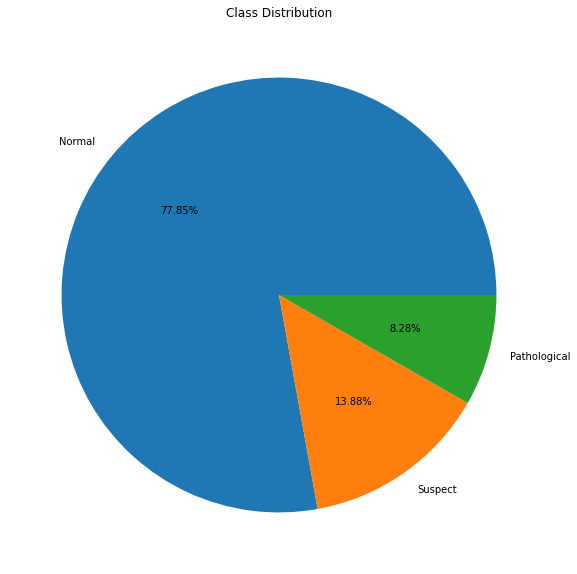

In [12]:
plt.figure(figsize=(10,10))
plt.pie(class_distribution,
        autopct='%.2f%%',
       labels=['Normal','Suspect','Pathological'])
plt.title('Class Distribution')
plt.show()

# Preprocessing the Dataset

# Scaling the Dataset

In [13]:
def preprocess_inputs(df):
    df=df.copy()
    #renaming the target column
   
    #train_test_split
    #splitting the dataset into x and y
    y=df['fetal_health'].astype(np.int)
    x=df.drop('fetal_health',axis=1)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    #scaling the feature data with standardScaler
    scaler=StandardScaler()
    x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
    
    return x_train,x_test,y_train,y_test

In [15]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)

In [19]:
y_train.unique()

array([2, 1, 3])

# Training the Model

In [20]:
models={
    'Logistic Regression':LogisticRegression(),
    'k-Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear SVM': LinearSVC(),
    'SVM':SVC(),
    'Neural Network':MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost':XGBClassifier(eval_metric='mlogloss'),
    'LightGBM':LGBMClassifier(),
    'CatBoost':CatBoostClassifier(verbose=0)
}

In [ ]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)

In [ ]:
models

# Fitting the models to train dataset

In [23]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [24]:
log_model.score(x_test,y_test)

0.8887147335423198

In [ ]:
df['fetal_health'].unique().dtype